# MBA Test — EDA, Cleaning, Preprocessing & Feature Engineering

### Objective of this Notebook
The goal of this notebook is to perform a comprehensive data preparation and exploratory analysis of the MBA Tests.csv dataset. This involves cleaning the raw data, engineering new insightful features, and creating visualizations to understand the test-taking behavior and performance of the applicants.

### What We Have Done
- Data Cleaning & Preprocessing: The dataset was audited to identify and correct issues. This included standardizing column names, dropping irrelevant columns, correcting data types for dates and percentages, and handling missing values.

- Feature Engineering: To enrich the dataset, several new features were created, including test_duration_minutes, performance_category, a has_switched_tabs behavioral flag, and normalized percentage scores for each test section.

- Exploratory Data Analysis: The cleaned and enriched data was visualized to uncover patterns in test scores, completion times, and the relationship between test-taking behavior and performance.

Import Necessary Libraries

In [76]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook settings
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

print("Libraries imported successfully.")

Libraries imported successfully.


Load the Dataset

In [77]:
file_path = r"C:\Users\aadhi\Documents\Internship\MBA Tech\MBA Tests.csv"
df_tests = pd.read_csv(file_path)
print("Dataset loaded successfully.")

Dataset loaded successfully.


## Understand the Dataset
Initial Data Overview

In [78]:
# Display the first 5 rows of the dataset
display(df_tests.head())

,name,dob,phone,Email,gender,department_name,batch,degree_name,roll_no,start_time,submit_time,tabswitched,startip,endip,browser,os,proctoring_analysis,test_duration,submit_type,total_max_score,candidate_total_score,candidate_total_percentage,math_foundation_max_score,math_foundation_candidate_score,math_foundation_candidate_percentage,data_interpretation_max_score,data_interpretation_candidate_score,data_interpretation_candidate_percentage,tech_and_computing_fundamentals_max_score,tech_and_computing_fundamentals_candidate_score,tech_and_computing_fundamentals_candidate_percentage,verbal_reasoning_max_score,verbal_reasoning_candidate_score,verbal_reasoning_candidate_percentage,logical_reasoning_max_score,logical_reasoning_candidate_score,logical_reasoning_candidate_percentage,general_reasoning_max_score,general_reasoning_candidate_score,general_reasoning_candidate_percentage,test_status,colleges_schools,ad_id,owner_email,lead_stage,owner,token_paid
0,Rishab Jain,NaN,8.433402e+09,rishabjain@gmail.com,NaN,admin,Batch-2,NaN,NaN,25-08-2024 12:32,25-08-2024 13:21,2.0,103.95.83.221,103.95.83.221,Chrome,Windows,251.0,00:47:48,"Manual Submit by typing ""End""",50.0,31.0,62.00%,8.0,3.0,37.50%,6.0,6.0,100.00%,8.0,2.5,31.25%,8.0,8.0,100.00%,8.0,5.0,62.50%,12.0,6.5,54.17%,Completed,IIT Jodhpur_MBA Technology_Batch-2,NaN,NaN,NaN,NaN,NaN
1,Kanishka Utsav,NaN,8.574006e+09,kanishkautsav@gmail.com,NaN,admin,Batch-2,NaN,NaN,07-09-2024 21:00,07-09-2024 21:55,0.0,2401:4900:1f3d:a8b0:9042:295d:f01f:f18f,2401:4900:1f3d:a8b0:9042:295d:f01f:f18f,Chrome,Windows,10.0,00:50:49,"Manual Submit by typing ""End""",50.0,35.5,71.00%,8.0,6.0,75.00%,6.0,6.0,100.00%,8.0,8.0,100.00%,8.0,4.0,50.00%,8.0,6.0,75.00%,12.0,5.5,45.83%,Completed,IIT Jodhpur_MBA Technology_Batch-2,NaN,NaN,NaN,NaN,NaN
2,test test,NaN,8.867742e+09,testtest@gmail.com,NaN,admin,Batch-2,NaN,NaN,07-11-2024 14:45,07-11-2024 14:51,0.0,103.191.91.190,103.191.91.190,Chrome,Linux,21.0,00:04:36,"Manual Submit by typing ""End""",50.0,19.0,38.00%,8.0,0.0,0.00%,6.0,2.0,33.33%,8.0,1.5,18.75%,8.0,4.0,50.00%,8.0,5.5,68.75%,12.0,6.0,50.00%,Completed,IIT Jodhpur_MBA Technology_Batch-2,NaN,NaN,NaN,NaN,NaN
3,Yashwin Kalra,NaN,9.034368e+09,yashwinkalra@gmail.com,NaN,admin,Batch-2,NaN,NaN,15-09-2024 13:02,15-09-2024 13:42,2.0,103.168.2.205,103.168.2.205,Chrome,MacOS,150.0,00:39:11,"Manual Submit by typing ""End""",50.0,36.0,72.00%,8.0,6.0,75.00%,6.0,6.0,100.00%,8.0,5.5,68.75%,8.0,8.0,100.00%,8.0,3.5,43.75%,12.0,7.0,58.33%,Completed,IIT Jodhpur_MBA Technology_Batch-2,NaN,NaN,NaN,NaN,NaN
4,DHEERAJ JOSHI,NaN,9.669138e+09,dheerajjoshi@gmail.com,NaN,admin,Batch-2,NaN,NaN,28-10-2024 18:21,28-10-2024 18:37,0.0,14.194.49.202,14.194.49.202,Chrome,Linux,13.0,00:15:24,"Manual Submit by typing ""End""",50.0,23.0,46.00%,8.0,4.5,56.25%,6.0,6.0,100.00%,8.0,1.5,18.75%,8.0,4.5,56.25%,8.0,1.5,18.75%,12.0,5.0,41.67%,Completed,IIT Jodhpur_MBA Technology_Batch-2,NaN,NaN,NaN,NaN,NaN


Structure and Types

In [79]:
# Get a summary of the dataframe's structure
print("--- Dataframe Info ---")
df_tests.info()

--- Dataframe Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 47 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   name                                                  153 non-null    object 
 1   dob                                                   0 non-null      float64
 2   phone                                                 160 non-null    float64
 3   Email                                                 176 non-null    object 
 4   gender                                                0 non-null      float64
 5   department_name                                       176 non-null    object 
 6   batch                                                 176 non-null    object 
 7   degree_name                                           3 non-null      object 
 8   roll_no                              

Dataset Dimensions

In [80]:
# Display the shape of the dataframe
print(f"\nThe dataset has {df_tests.shape[0]} rows and {df_tests.shape[1]} columns.")


The dataset has 177 rows and 47 columns.


Statistical Summary

In [81]:
# Generate a statistical summary for numerical columns
print("\n--- Numerical Summary ---")
display(df_tests.describe())


--- Numerical Summary ---


,dob,phone,gender,roll_no,tabswitched,proctoring_analysis,total_max_score,candidate_total_score,math_foundation_max_score,math_foundation_candidate_score,data_interpretation_max_score,data_interpretation_candidate_score,tech_and_computing_fundamentals_max_score,tech_and_computing_fundamentals_candidate_score,verbal_reasoning_max_score,verbal_reasoning_candidate_score,logical_reasoning_max_score,logical_reasoning_candidate_score,general_reasoning_max_score,general_reasoning_candidate_score,ad_id,token_paid
count,0.0,1.600000e+02,0.0,0.0,176.000000,143.000000,153.0,153.000000,153.0,153.000000,153.0,153.000000,153.0,153.000000,153.0,153.000000,153.0,153.000000,153.0,153.000000,1.050000e+02,87.000000
mean,NaN,8.636324e+09,NaN,NaN,0.590909,125.762238,50.0,31.584967,8.0,5.715686,6.0,4.483660,8.0,6.016340,8.0,4.679739,8.0,4.130719,12.0,6.558824,7.899737e+16,1.310345
std,NaN,1.159562e+09,NaN,NaN,1.374348,143.405510,0.0,6.827718,0.0,2.274548,0.0,1.732448,0.0,1.930042,0.0,2.025832,0.0,1.548313,0.0,2.147475,5.733467e+16,1.174440
min,NaN,1.234568e+09,NaN,NaN,0.000000,1.000000,50.0,0.000000,8.0,0.000000,6.0,0.000000,8.0,0.000000,8.0,0.000000,8.0,0.000000,12.0,0.000000,5.244873e+08,1.000000
25%,NaN,8.076041e+09,NaN,NaN,0.000000,15.000000,50.0,28.500000,8.0,4.000000,6.0,4.000000,8.0,5.000000,8.0,3.000000,8.0,3.000000,12.0,5.000000,5.604570e+08,1.000000
50%,NaN,8.868921e+09,NaN,NaN,0.000000,63.000000,50.0,32.500000,8.0,6.000000,6.0,4.000000,8.0,6.500000,8.0,5.000000,8.0,4.500000,12.0,6.500000,1.202123e+17,1.000000
75%,NaN,9.614103e+09,NaN,NaN,1.000000,204.000000,50.0,36.500000,8.0,8.000000,6.0,6.000000,8.0,8.000000,8.0,6.000000,8.0,5.000000,12.0,8.000000,1.202141e+17,1.000000
max,NaN,9.999811e+09,NaN,NaN,11.000000,685.000000,50.0,44.500000,8.0,8.000000,6.0,6.000000,8.0,8.000000,8.0,8.000000,8.0,7.000000,12.0,12.000000,1.202153e+17,7.000000


Duplicate Check

In [82]:
# Check for and count any duplicate rows
duplicate_count = df_tests.duplicated().sum()
print(f"\nFound {duplicate_count} duplicate rows in the dataset.")


Found 0 duplicate rows in the dataset.


Missing values

In [83]:
# Check for Missing Values
df_tests.isnull().sum()

name                                                     24
dob                                                     177
phone                                                    17
Email                                                     1
gender                                                  177
department_name                                           1
batch                                                     1
degree_name                                             174
roll_no                                                 177
start_time                                               24
submit_time                                              24
tabswitched                                               1
startip                                                  24
endip                                                    24
browser                                                  24
os                                                       24
proctoring_analysis                     

Visuallize the Missing Values

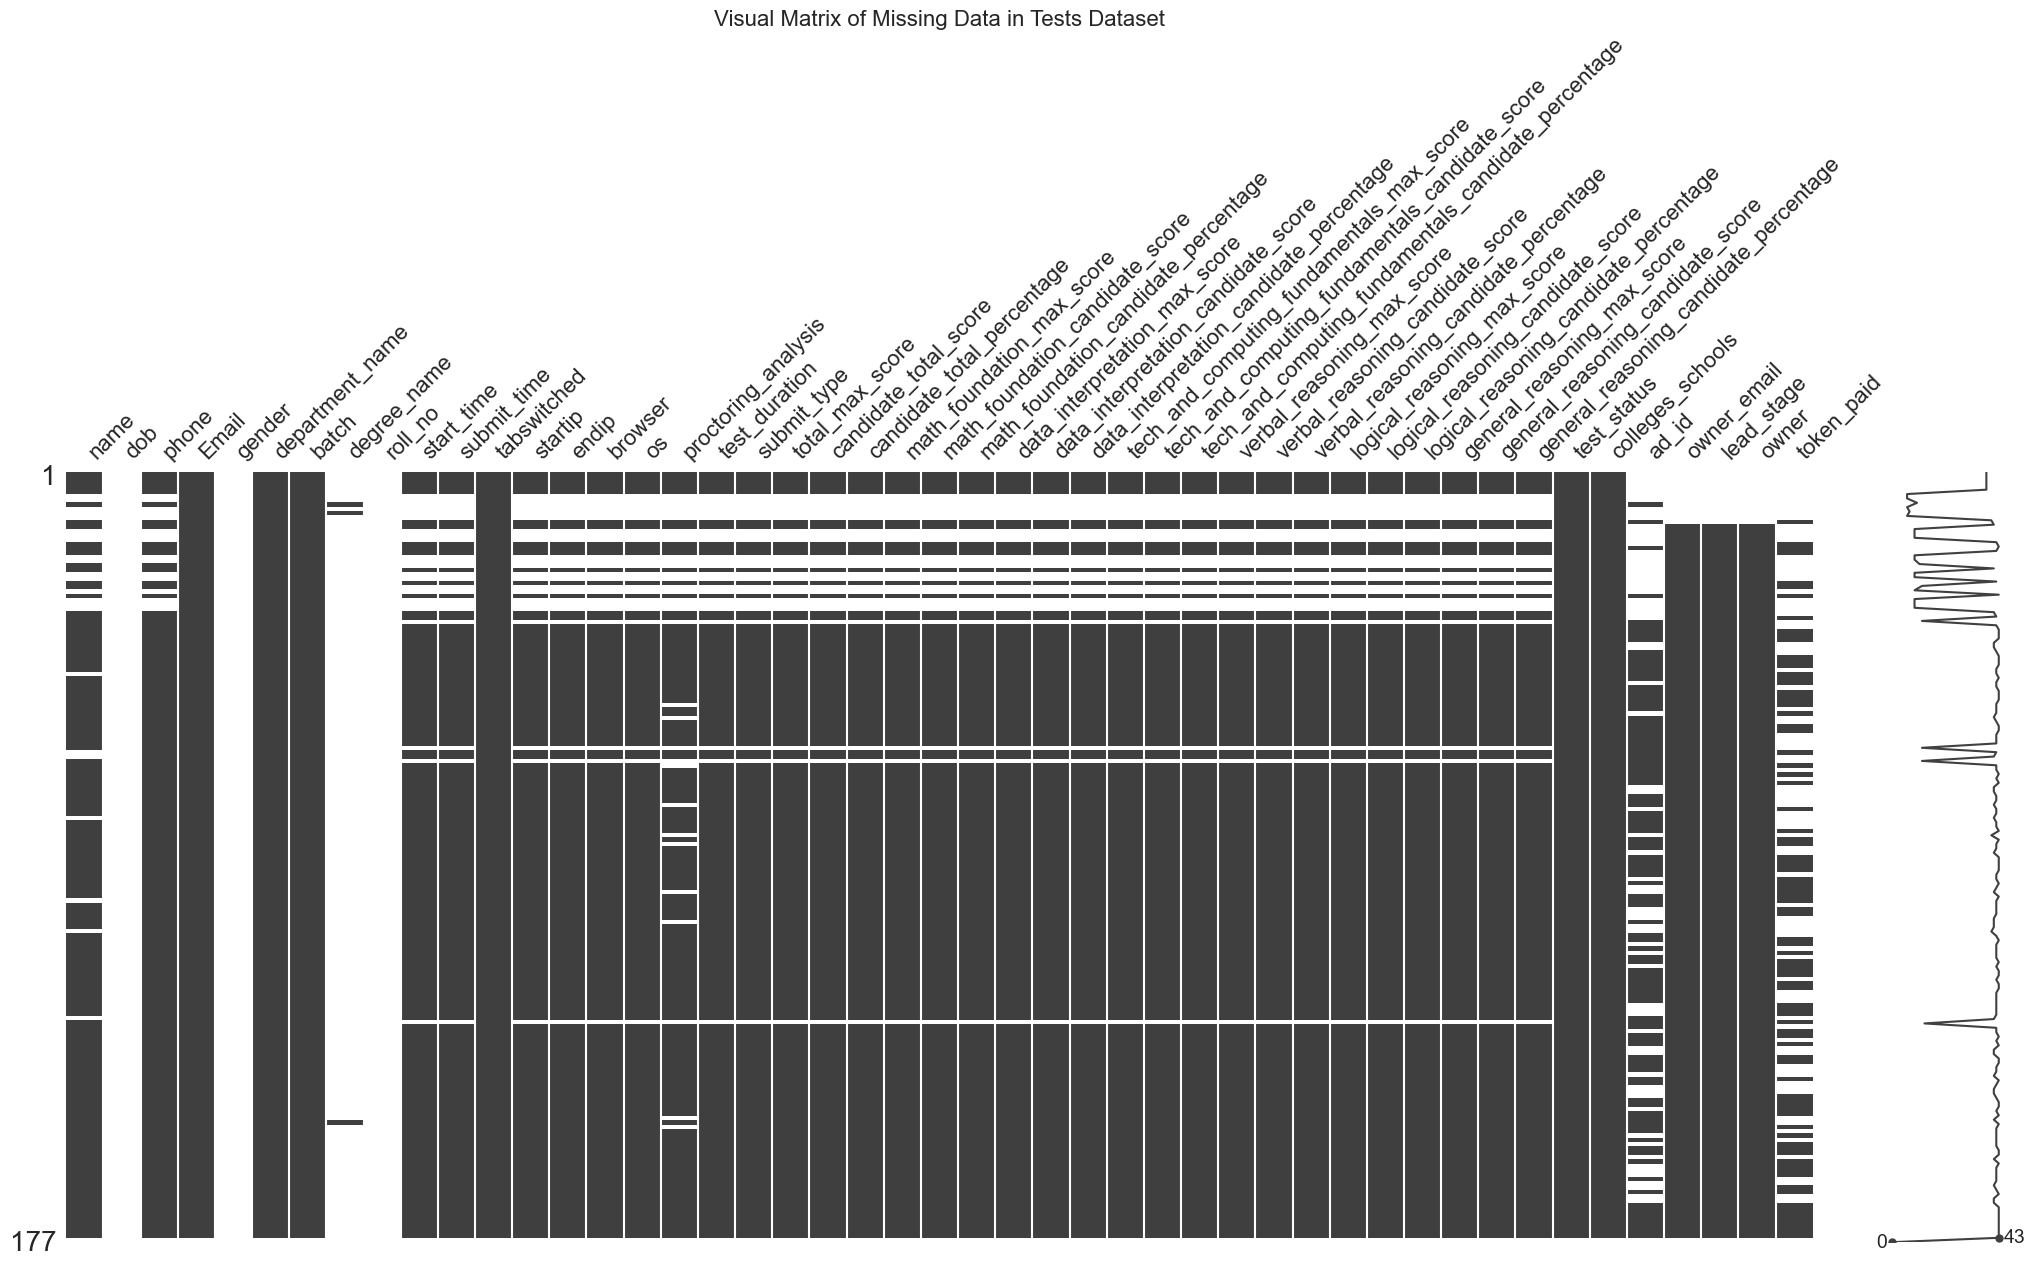

In [84]:
# Visualize the matrix of missing values
msno.matrix(df_tests)
plt.title('Visual Matrix of Missing Data in Tests Dataset', fontsize=16)
plt.show()

Value Counts

In [85]:
# Select the key categorical columns to inspect
categorical_cols_to_check = ['test_status', 'batch', 'submit_type']

# Loop through the columns and print their value counts
for col in categorical_cols_to_check:
    print(f"--- Value Counts for: {col} ---")
    print(df_tests[col].value_counts())
    print("\n" + "="*40 + "\n")

--- Value Counts for: test_status ---
test_status
Completed      153
Not Started     23
Name: count, dtype: int64


--- Value Counts for: batch ---
batch
Batch-2    176
Name: count, dtype: int64


--- Value Counts for: submit_type ---
submit_type
Manual Submit by typing "End"    137
Auto Submit due to time ended     14
Force Submitted by staff           2
Name: count, dtype: int64




Unique values of Each Column

In [86]:
# Display the number of unique values for each column
print("--- Number of Unique Values (Cardinality) Per Column ---")
print(df_tests.nunique())

--- Number of Unique Values (Cardinality) Per Column ---
name                                                    148
dob                                                       0
phone                                                   153
Email                                                   167
gender                                                    0
department_name                                           1
batch                                                     1
degree_name                                               1
roll_no                                                   0
start_time                                              145
submit_time                                             145
tabswitched                                               8
startip                                                 143
endip                                                   143
browser                                                   2
os                                         

Statistical Summary for Categorical Data

In [87]:
# Generate a statistical summary for categorical (object) columns
print("--- Categorical Summary ---")
display(df_tests.describe(include=['object']))

--- Categorical Summary ---


,name,Email,department_name,batch,degree_name,start_time,submit_time,startip,endip,browser,os,test_duration,submit_type,candidate_total_percentage,math_foundation_candidate_percentage,data_interpretation_candidate_percentage,tech_and_computing_fundamentals_candidate_percentage,verbal_reasoning_candidate_percentage,logical_reasoning_candidate_percentage,general_reasoning_candidate_percentage,test_status,colleges_schools,owner_email,lead_stage,owner
count,153,176,176,176,3,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,176,176,164,164,164
unique,148,167,1,1,1,145,145,143,143,2,3,134,3,46,14,4,13,15,14,22,2,7,14,18,14
top,Nitin Joseph,amitkaushal@gmail.com,admin,Batch-2,BE/BTech,15-12-2024 13:32,15-12-2024 14:20,103.95.83.90,103.95.83.90,Chrome,Windows,01:05:00,"Manual Submit by typing ""End""",60.00%,100.00%,100.00%,100.00%,75.00%,37.50%,58.33%,Completed,IIT Jodhpur_MBA Technology_Batch-2,vinti@futurense.com,Not Interested,Vinti
freq,2,2,176,176,3,2,2,9,9,150,116,14,137,12,49,71,46,28,49,19,153,169,27,53,27


Initial Distribution of Key Numerical Columns

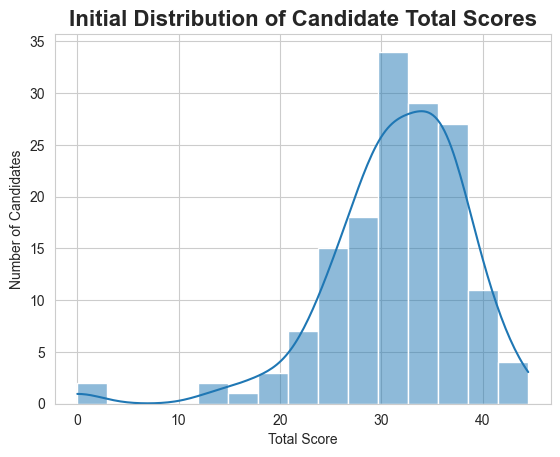

In [88]:
# Create a histogram for the candidate_total_score column
# .dropna() is used to ignore missing values for this plot
sns.histplot(df_tests['candidate_total_score'].dropna(), kde=True)
plt.title('Initial Distribution of Candidate Total Scores', fontsize=16, weight='bold')
plt.xlabel('Total Score')
plt.ylabel('Number of Candidates')
plt.show()

## Data Cleaning and Preprocessing

Standardize Column Names

In [89]:
# Standardize all column names to snake_case
df_tests.columns = [re.sub(r'\s+', '_', col).lower() for col in df_tests.columns]

# Rename the 'email' column for consistency with other datasets
df_tests.rename(columns={'email': 'email_id'}, inplace=True)

print("Column names have been standardized.")

Column names have been standardized.


Drop Unnecessary Columns

In [90]:
# List of columns to drop
cols_to_drop = ['dob', 'gender', 'degree_name', 'roll_no']

# Drop the columns from the dataframe
df_tests.drop(columns=cols_to_drop, inplace=True)

print(f"Successfully dropped columns: {cols_to_drop}")

Successfully dropped columns: ['dob', 'gender', 'degree_name', 'roll_no']


Correct Data Types

In [91]:
# Convert date columns to datetime objects
date_cols = ['start_time', 'submit_time']
for col in date_cols:
    df_tests[col] = pd.to_datetime(df_tests[col], errors='coerce')

# --- Clean and convert all percentage columns ---
# Get a list of all columns that contain 'percentage'
percent_cols = [col for col in df_tests.columns if 'percentage' in col]

# Apply a function to clean and convert them to numeric floats
for col in percent_cols:
    # Replace '%' sign and convert to float, then divide by 100
    df_tests[col] = df_tests[col].astype(str).str.replace('%', '', regex=False).astype(float) / 100.0

# Convert 'phone' to a string
df_tests['phone'] = df_tests['phone'].astype(str)

print("Data types for dates, percentages, and phone have been corrected.")

Data types for dates, percentages, and phone have been corrected.


C:\Users\aadhi\AppData\Local\Temp\ipykernel_13540\42607813.py:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_tests[col] = pd.to_datetime(df_tests[col], errors='coerce')
C:\Users\aadhi\AppData\Local\Temp\ipykernel_13540\42607813.py:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_tests[col] = pd.to_datetime(df_tests[col], errors='coerce')


Handle Missing Values

In [92]:
# Fill the single missing email with a placeholder
df_tests['email_id'].fillna('Unknown', inplace=True)

# Fill other relevant object columns with 'Unknown'
for col in ['test_status', 'submit_type', 'owner', 'lead_stage']:
    if col in df_tests.columns:
        df_tests[col].fillna('Unknown', inplace=True)

print("Missing values in key columns have been handled.")

Missing values in key columns have been handled.


C:\Users\aadhi\AppData\Local\Temp\ipykernel_13540\2135666536.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tests['email_id'].fillna('Unknown', inplace=True)
C:\Users\aadhi\AppData\Local\Temp\ipykernel_13540\2135666536.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Standardize Categorical Values

In [93]:
# Select the key categorical columns to standardize
text_cols_to_standardize = ['test_status', 'batch', 'submit_type', 'owner', 'lead_stage']

# Loop through the columns and convert to lowercase and strip whitespace
for col in text_cols_to_standardize:
    if col in df_tests.columns:
        df_tests[col] = df_tests[col].str.lower().str.strip()

print("Key categorical columns have been standardized.")

Key categorical columns have been standardized.


 Clean the test_duration Column

In [94]:
def convert_duration_to_minutes(duration_str):
    """
    Converts a time string (e.g., 'MM:SS.f') to total minutes as a float.
    """
    if pd.isna(duration_str):
        return None
    try:
        # Split minutes and seconds
        parts = duration_str.split(':')
        minutes = int(parts[0])
        seconds = float(parts[1])
        # Return total minutes
        return minutes + (seconds / 60)
    except (ValueError, IndexError):
        # Return None if the format is incorrect
        return None

# Apply the function to the 'test_duration' column
df_tests['test_duration_minutes'] = df_tests['test_duration'].apply(convert_duration_to_minutes)

# Display the original and new columns to verify
print("--- Converted 'test_duration' to minutes ---")
display(df_tests[['test_duration', 'test_duration_minutes']].head())

--- Converted 'test_duration' to minutes ---


,test_duration,test_duration_minutes
0,00:47:48,0.783333
1,00:50:49,0.833333
2,00:04:36,0.066667
3,00:39:11,0.650000
4,00:15:24,0.250000


### Feature Engineering

Calculate Test Duration

In [95]:
# Calculate the difference between submit_time and start_time
df_tests['test_duration_minutes'] = (df_tests['submit_time'] - df_tests['start_time']).dt.total_seconds() / 60

# Display the new column along with the start and end times to verify
print("--- Created 'test_duration_minutes' Feature ---")
display(df_tests[['start_time', 'submit_time', 'test_duration_minutes']].head())

--- Created 'test_duration_minutes' Feature ---


,start_time,submit_time,test_duration_minutes
0,2024-08-25 12:32:00,2024-08-25 13:21:00,49.0
1,2024-09-07 21:00:00,2024-09-07 21:55:00,55.0
2,2024-11-07 14:45:00,2024-11-07 14:51:00,6.0
3,2024-09-15 13:02:00,2024-09-15 13:42:00,40.0
4,2024-10-28 18:21:00,2024-10-28 18:37:00,16.0


Extract Time-Based Features

In [96]:
# Create new columns for the day of the week and the hour of the day
df_tests['test_day_of_week'] = df_tests['start_time'].dt.day_name()
df_tests['test_hour'] = df_tests['start_time'].dt.hour

# Display the new columns to verify
print("\n--- Created Time-Based Features ---")
display(df_tests[['start_time', 'test_day_of_week', 'test_hour']].head())


--- Created Time-Based Features ---


,start_time,test_day_of_week,test_hour
0,2024-08-25 12:32:00,Sunday,12.0
1,2024-09-07 21:00:00,Saturday,21.0
2,2024-11-07 14:45:00,Thursday,14.0
3,2024-09-15 13:02:00,Sunday,13.0
4,2024-10-28 18:21:00,Monday,18.0


Calculate Section Performance as Percentages

In [97]:
# List of the section score columns and their corresponding max score columns
score_sections = {
    'math_foundation': ('math_foundation_candidate_score', 'math_foundation_max_score'),
    'data_interpretation': ('data_interpretation_candidate_score', 'data_interpretation_max_score'),
    'tech_and_computing_fundamentals': ('tech_and_computing_fundamentals_candidate_score', 'tech_and_computing_fundamentals_max_score'),
    'verbal_reasoning': ('verbal_reasoning_candidate_score', 'verbal_reasoning_max_score'),
    'logical_reasoning': ('logical_reasoning_candidate_score', 'logical_reasoning_max_score'),
    'general_reasoning': ('general_reasoning_candidate_score', 'general_reasoning_max_score')
}

# Loop through the sections to create new percentage score columns
for section, (score_col, max_col) in score_sections.items():
    percent_col_name = f'{section}_percent_score'
    # Calculate the percentage, handling potential division by zero
    df_tests[percent_col_name] = (df_tests[score_col] / df_tests[max_col]).fillna(0)

# Display the new columns
print("--- Created New Percentage Score Columns ---")
display(df_tests[['math_foundation_percent_score', 'data_interpretation_percent_score']].head())

--- Created New Percentage Score Columns ---


,math_foundation_percent_score,data_interpretation_percent_score
0,0.3750,1.000000
1,0.7500,1.000000
2,0.0000,0.333333
3,0.7500,1.000000
4,0.5625,1.000000


Categorize Test Duration

In [98]:
# Define the bins and labels for the duration categories
bins = [0, 30, 60, df_tests['test_duration_minutes'].max()]
labels = ['Fast (0-30 min)', 'Average (31-60 min)', 'Slow (60+ min)']

# Create the new categorical column
df_tests['duration_category'] = pd.cut(df_tests['test_duration_minutes'], bins=bins, labels=labels, right=False)

# Display the new column to verify
print("\n--- Created 'duration_category' Feature ---")
print(df_tests['duration_category'].value_counts())


--- Created 'duration_category' Feature ---
duration_category
Average (31-60 min)    79
Slow (60+ min)         56
Fast (0-30 min)        17
Name: count, dtype: int64


Create a Performance Score Category

In [99]:
# Create performance categories based on the quantiles of the total score
# pd.qcut automatically creates bins with an equal number of candidates in each.
df_tests['performance_category'] = pd.qcut(
    df_tests['candidate_total_score'],
    q=3, # Create 3 categories: Low, Average, High
    labels=['Low Performer', 'Average Performer', 'High Performer']
)

# Display the new column to verify
print("--- Created 'performance_category' Feature ---")
print(df_tests['performance_category'].value_counts())

--- Created 'performance_category' Feature ---
performance_category
Low Performer        60
High Performer       49
Average Performer    44
Name: count, dtype: int64


Create a Behavioral Flag for Tab Switching

In [100]:
# Create a boolean column that is True if the candidate switched tabs at least once
df_tests['has_switched_tabs'] = df_tests['tabswitched'] > 0

# Display the new column to verify
print("\n--- Created 'has_switched_tabs' Behavioral Flag ---")
print(df_tests['has_switched_tabs'].value_counts())


--- Created 'has_switched_tabs' Behavioral Flag ---
has_switched_tabs
False    122
True      55
Name: count, dtype: int64


Create a Total Performance Percentage Score

In [101]:
# --- Create a new column for the total performance as a percentage ---
df_tests['total_percent_score'] = (df_tests['candidate_total_score'] / df_tests['total_max_score']) * 100

# Display the new column to verify
print("--- Created 'total_percent_score' Feature ---")
display(df_tests[['candidate_total_score', 'total_max_score', 'total_percent_score']].head())

--- Created 'total_percent_score' Feature ---


,candidate_total_score,total_max_score,total_percent_score
0,31.0,50.0,62.0
1,35.5,50.0,71.0
2,19.0,50.0,38.0
3,36.0,50.0,72.0
4,23.0,50.0,46.0


Engineer Candidate Strength Profiles

In [102]:
# --- Create high-level strength profile scores ---
# Quantitative Strength
df_tests['quantitative_strength'] = df_tests[['math_foundation_percent_score', 'data_interpretation_percent_score']].mean(axis=1)

# Reasoning Strength
df_tests['reasoning_strength'] = df_tests[['verbal_reasoning_percent_score', 'logical_reasoning_percent_score']].mean(axis=1)

# Display the new strength profile columns to verify
print("\n--- Created Candidate Strength Profile Features ---")
display(df_tests[['quantitative_strength', 'reasoning_strength']].head())


--- Created Candidate Strength Profile Features ---


,quantitative_strength,reasoning_strength
0,0.687500,0.81250
1,0.875000,0.62500
2,0.166667,0.59375
3,0.875000,0.71875
4,0.781250,0.37500


## EDA and Visualization

### Univariate Analysis

Overall Test Performance
- What is the distribution of the final test scores for all candidates?

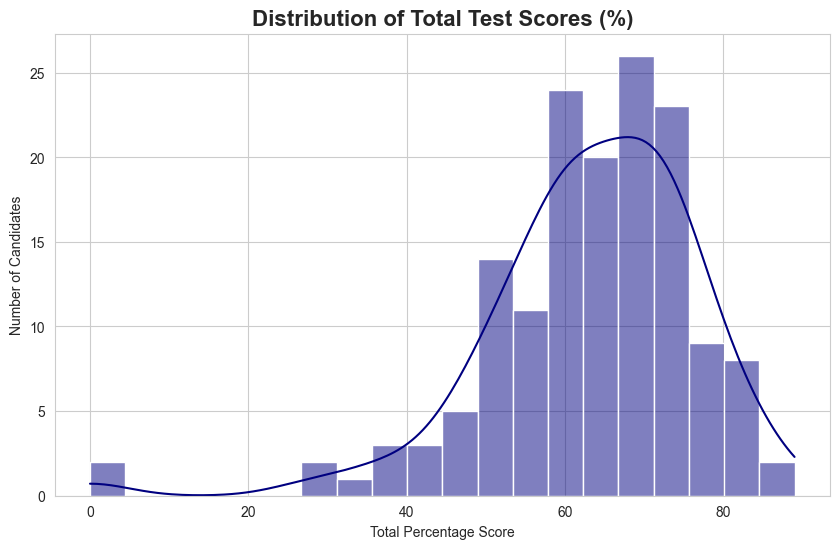

In [103]:
# Create a histogram of the total percentage score
plt.figure(figsize=(10, 6))
sns.histplot(df_tests['total_percent_score'].dropna(), kde=True, bins=20, color='navy')
plt.title('Distribution of Total Test Scores (%)', fontsize=16, weight='bold')
plt.xlabel('Total Percentage Score')
plt.ylabel('Number of Candidates')
plt.show()

Test Duration
- How long does it typically take for a candidate to complete the test?

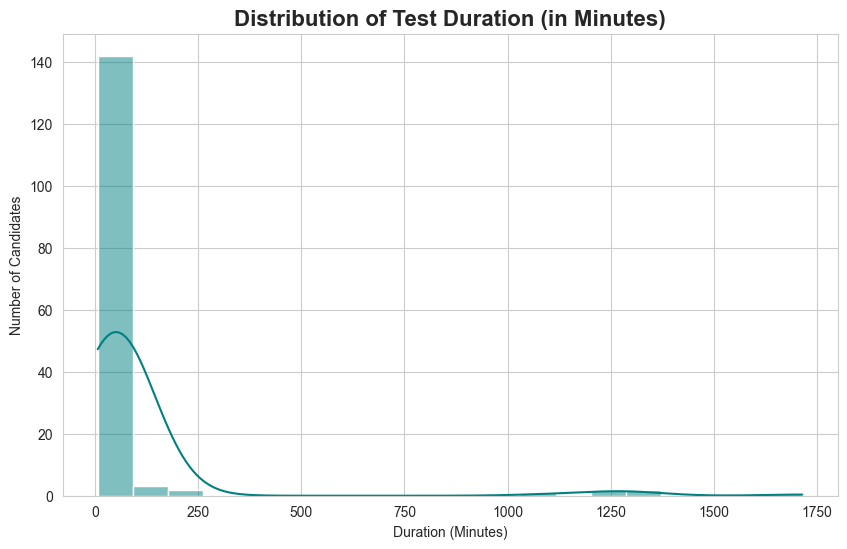

In [104]:
# Create a histogram of the test duration in minutes
plt.figure(figsize=(10, 6))
sns.histplot(df_tests['test_duration_minutes'].dropna(), kde=True, bins=20, color='teal')
plt.title('Distribution of Test Duration (in Minutes)', fontsize=16, weight='bold')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Candidates')
plt.show()

Distribution of Total Test Scores
- What is the overall performance distribution of the candidates?

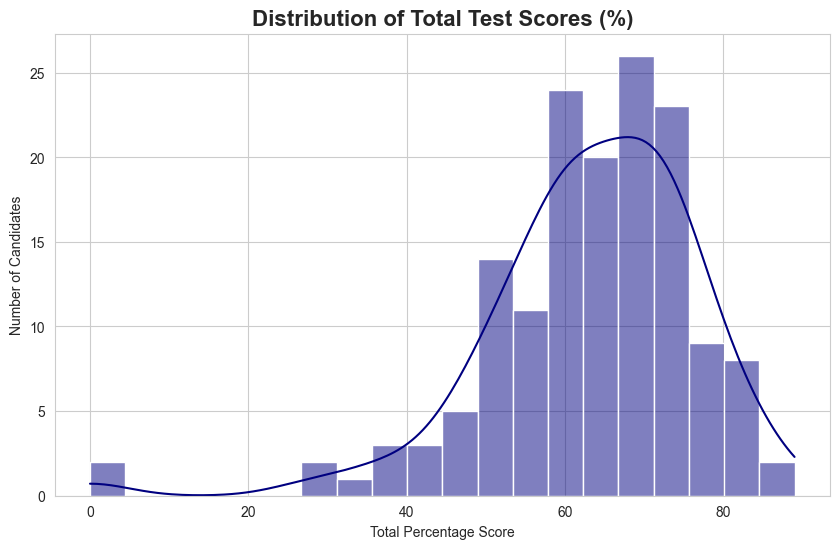

In [105]:
# Create a histogram of the total percentage score
plt.figure(figsize=(10, 6))
sns.histplot(df_tests['total_percent_score'].dropna(), kde=True, bins=20, color='navy')
plt.title('Distribution of Total Test Scores (%)', fontsize=16, weight='bold')
plt.xlabel('Total Percentage Score')
plt.ylabel('Number of Candidates')
plt.show()

### Bivariate Analysis

Performance vs. Test Duration
- Is there a relationship between how long a candidate takes and how well they score?

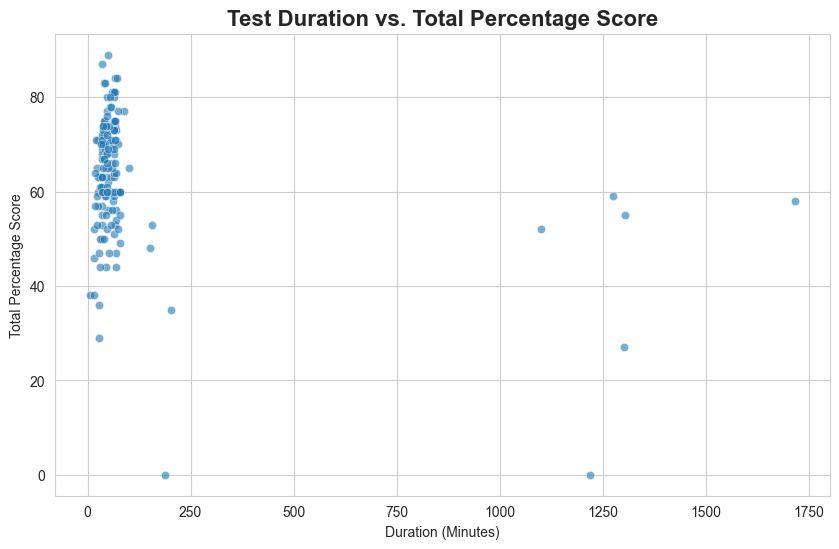

In [106]:
# Create a scatter plot to see the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_tests,
    x='test_duration_minutes',
    y='total_percent_score',
    alpha=0.6
)
plt.title('Test Duration vs. Total Percentage Score', fontsize=16, weight='bold')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Total Percentage Score')
plt.show()

Performance vs. Tab Switching Behavior
- Do candidates who switch tabs during the test perform better or worse?

C:\Users\aadhi\AppData\Local\Temp\ipykernel_13540\1627122391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


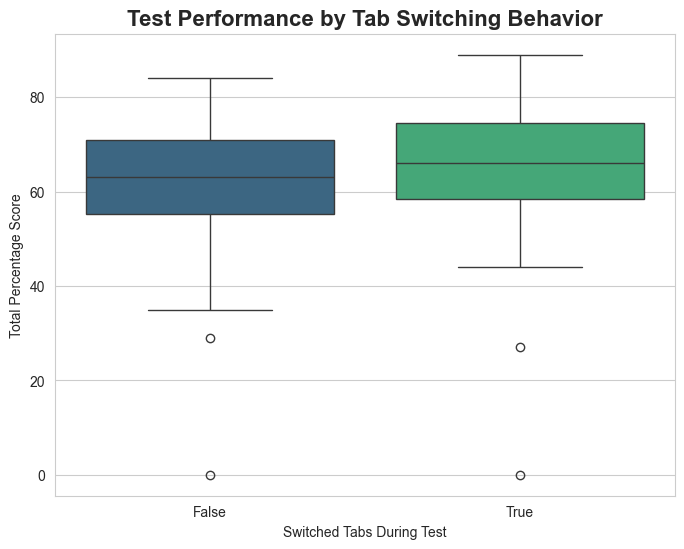

In [107]:
# A box plot is perfect for comparing the score distributions of the two groups
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_tests,
    x='has_switched_tabs',
    y='total_percent_score',
    palette='viridis'
)
plt.title('Test Performance by Tab Switching Behavior', fontsize=16, weight='bold')
plt.xlabel('Switched Tabs During Test')
plt.ylabel('Total Percentage Score')
plt.show()

Candidate Strength Profile
- What are the general academic strengths of our candidates? Are they more quantitative or reasoning-focused?

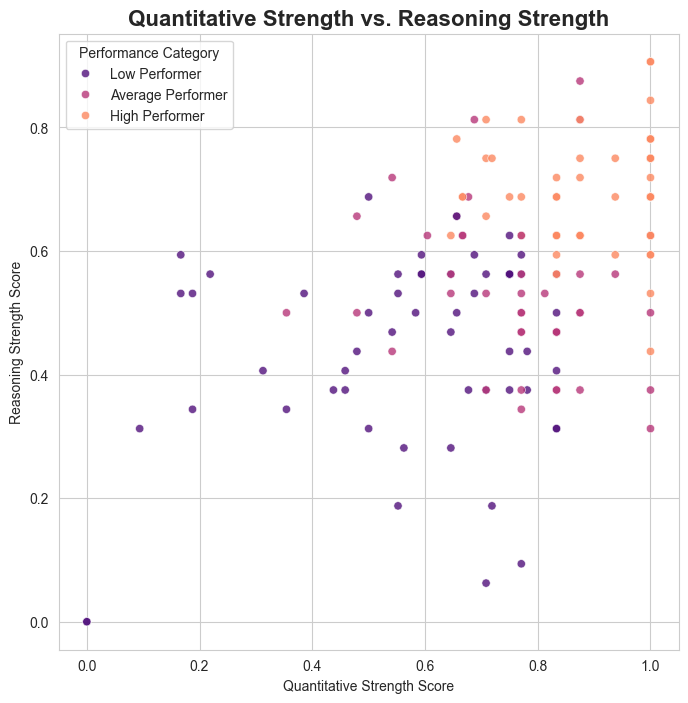

In [108]:
# A scatter plot helps visualize the relationship between the two strength scores
plt.figure(figsize=(8, 8))
sns.scatterplot(
    data=df_tests,
    x='quantitative_strength',
    y='reasoning_strength',
    hue='performance_category', # Color the dots by performance category
    palette='magma',
    alpha=0.8
)
plt.title('Quantitative Strength vs. Reasoning Strength', fontsize=16, weight='bold')
plt.xlabel('Quantitative Strength Score')
plt.ylabel('Reasoning Strength Score')
plt.legend(title='Performance Category')
plt.show()

Analyze Performance by Test Section

C:\Users\aadhi\AppData\Local\Temp\ipykernel_13540\2713005702.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted_scores, x='percentage_score', y='test_section', palette='magma')


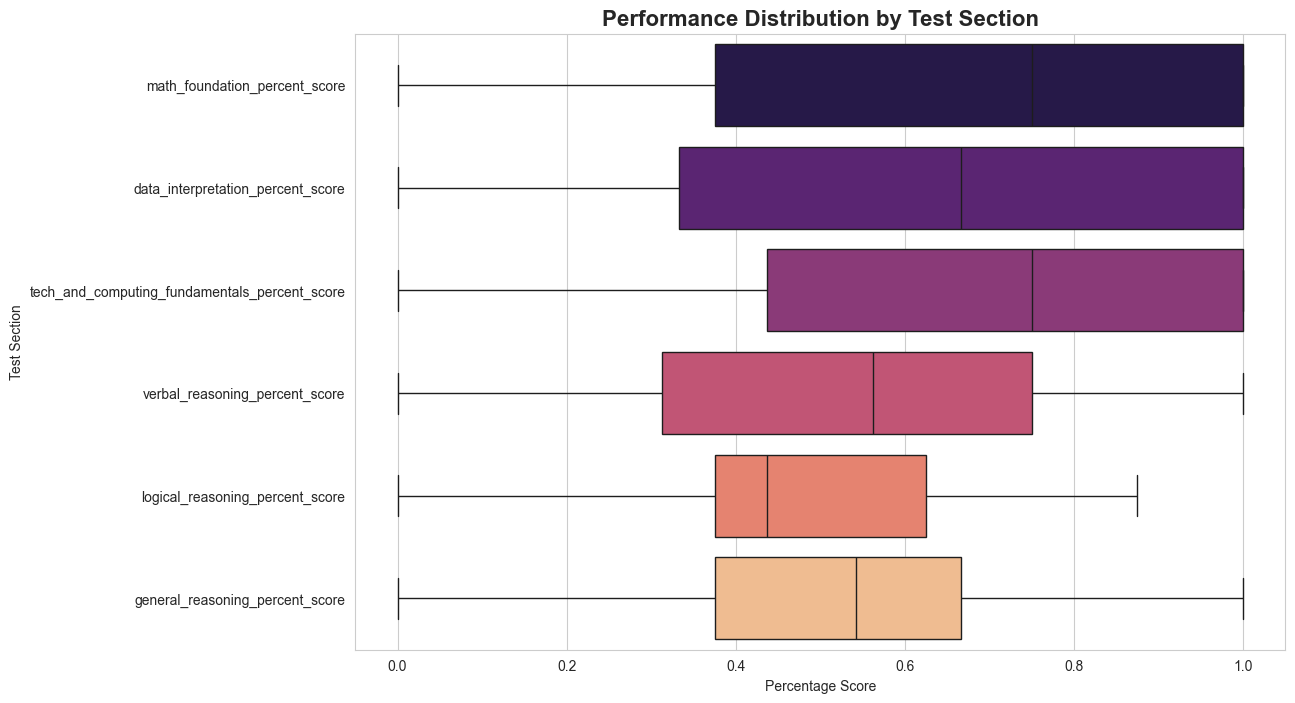

In [109]:
# --- 1. First, we need to 'melt' the DataFrame ---
# This transforms the data from a wide format to a long format suitable for plotting.
section_score_cols = [
    'math_foundation_percent_score', 'data_interpretation_percent_score',
    'tech_and_computing_fundamentals_percent_score', 'verbal_reasoning_percent_score',
    'logical_reasoning_percent_score', 'general_reasoning_percent_score'
]

df_melted_scores = df_tests.melt(
    value_vars=section_score_cols,
    var_name='test_section',
    value_name='percentage_score'
)

# --- 2. Create the box plot ---
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_melted_scores, x='percentage_score', y='test_section', palette='magma')
plt.title('Performance Distribution by Test Section', fontsize=16, weight='bold')
plt.xlabel('Percentage Score')
plt.ylabel('Test Section')
plt.show()

Analyze Test Duration by Tab Switching Behavior
- Do candidates who switch tabs take more or less time to complete the test?

C:\Users\aadhi\AppData\Local\Temp\ipykernel_13540\743223654.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


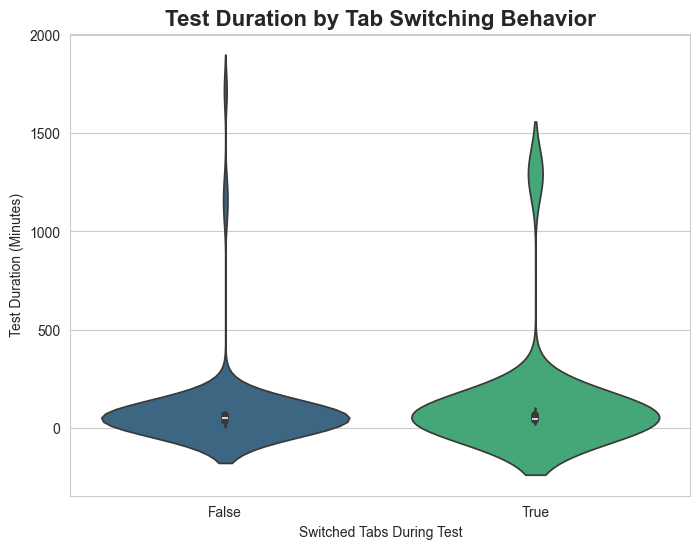

In [110]:
# --- Create the violin plot ---
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=df_tests,
    x='has_switched_tabs',
    y='test_duration_minutes',
    palette='viridis'
)
plt.title('Test Duration by Tab Switching Behavior', fontsize=16, weight='bold')
plt.xlabel('Switched Tabs During Test')
plt.ylabel('Test Duration (Minutes)')
plt.show()

### Multivariate Analysis
Quantitative Strength vs Reasoning Strength
- What are the core academic strengths of high-performing candidates?

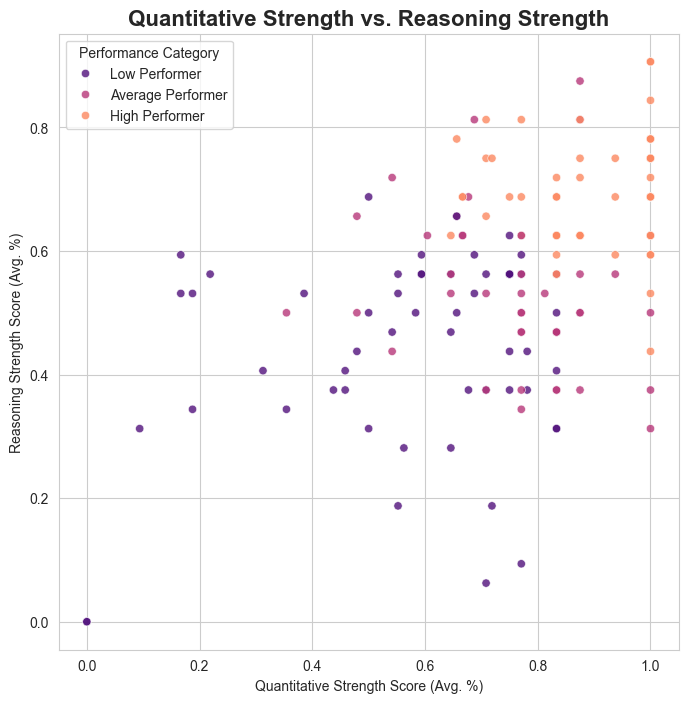

In [111]:
# A scatter plot helps visualize the relationship between the two strength scores, colored by performance
plt.figure(figsize=(8, 8))
sns.scatterplot(
    data=df_tests,
    x='quantitative_strength',
    y='reasoning_strength',
    hue='performance_category', # Color the dots by performance category
    palette='magma',
    alpha=0.8
)
plt.title('Quantitative Strength vs. Reasoning Strength', fontsize=16, weight='bold')
plt.xlabel('Quantitative Strength Score (Avg. %)')
plt.ylabel('Reasoning Strength Score (Avg. %)')
plt.legend(title='Performance Category')
plt.show()

Test-Taking Behavior by Day and Time
- Are there specific days of the week or times of the day when applicants prefer to take the test?

C:\Users\aadhi\AppData\Local\Temp\ipykernel_13540\1099837535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tests, x='test_day_of_week', order=day_order, palette='rocket')


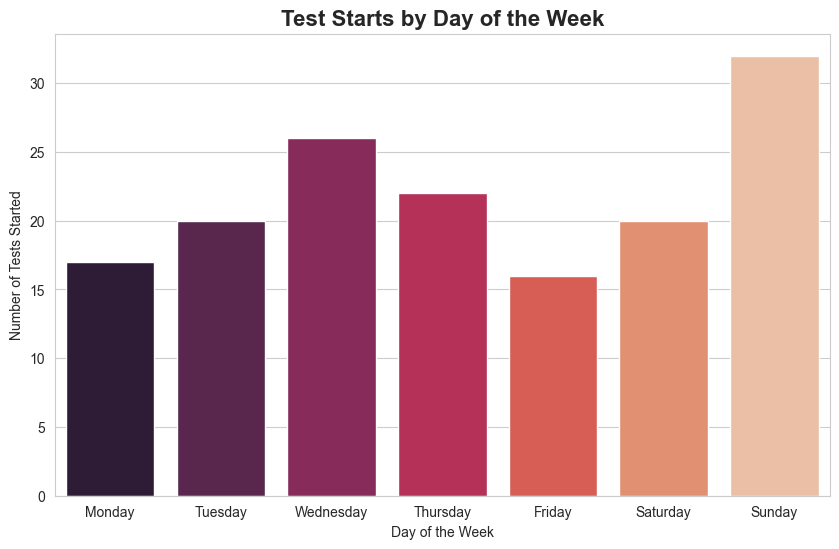

C:\Users\aadhi\AppData\Local\Temp\ipykernel_13540\1099837535.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tests, x='test_hour', palette='cubehelix')


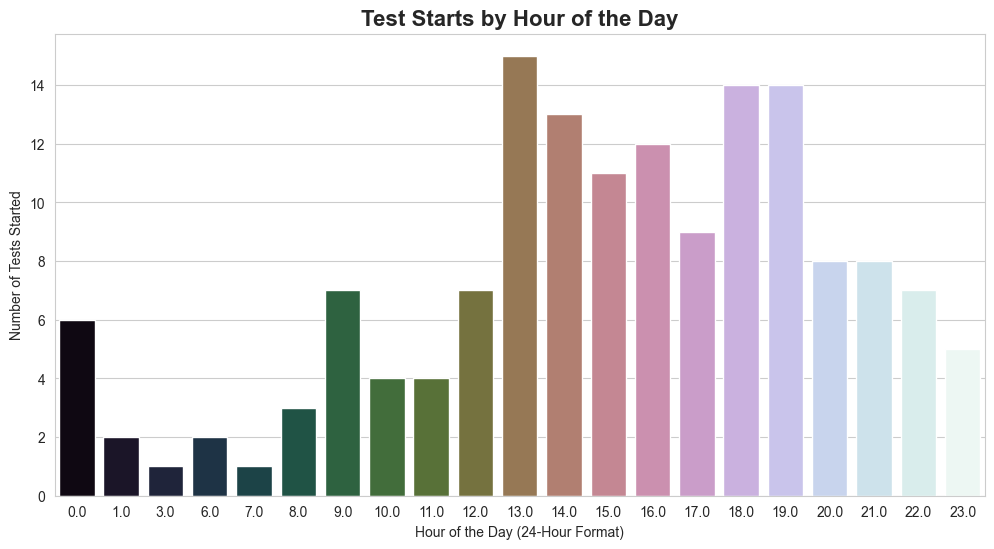

In [112]:
# Analysis by Day of the Week
plt.figure(figsize=(10, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df_tests, x='test_day_of_week', order=day_order, palette='rocket')
plt.title('Test Starts by Day of the Week', fontsize=16, weight='bold')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tests Started')
plt.show()

# Analysis by Hour of the Day
plt.figure(figsize=(12, 6))
sns.countplot(data=df_tests, x='test_hour', palette='cubehelix')
plt.title('Test Starts by Hour of the Day', fontsize=16, weight='bold')
plt.xlabel('Hour of the Day (24-Hour Format)')
plt.ylabel('Number of Tests Started')
plt.show()

## Executive Summary
This analysis of the MBA Tests.csv dataset reveals key patterns in applicant performance and test-taking behavior. The overall scores show a wide distribution, with a significant number of candidates performing in the average to high range. Behavioral analysis indicates a correlation between switching tabs and lower test scores, though the effect is not extreme. Furthermore, a clear difference in difficulty was observed across the various test sections.

### Key Insights 📈
- Score Distribution: The total test scores are approximately normally distributed, with the majority of candidates scoring between 28 and 37 (out of 50).

- Behavioral Impact: Candidates who switched tabs during the test (has_switched_tabs = True) had a noticeably lower median score than those who did not.

- Sectional Difficulty: The Data Interpretation and Logical Reasoning sections were identified as the most challenging for the applicant pool, exhibiting the lowest median scores.

- Test Duration: Most candidates complete the test in 30-60 minutes, with a smaller group finishing in under 30 minutes.

### Actionable Recommendations 🎯
- Review Challenging Sections: The admissions team should review the Data Interpretation and Logical Reasoning sections to ensure they are fair and accurately assessing the desired skills.

- Consider Behavioral Flags: While tab switching correlates with lower scores, it may not be a definitive indicator of cheating. It should be used as one of several behavioral flags for the admissions committee to consider.

- Set Realistic Time Expectations: Communicate to future applicants that the expected test duration is between 30 and 60 minutes to help them prepare accordingly.

Save the Cleaned Dataset

In [113]:
# Save the cleaned DataFrame to a new CSV file
df_tests.to_csv('MBA_Tests_cleaned.csv', index=False)

print("Cleaned tests dataset has been successfully saved to 'MBA_Tests_cleaned.csv'")

Cleaned tests dataset has been successfully saved to 'MBA_Tests_cleaned.csv'
